In [1]:
#biblioteca para formatar data.
import datetime
import string
#
from collections import Counter

#
import collections

#
import pandas as pd

#
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
ref_arquivo = open('whats.txt', 'r', encoding = 'utf-8')
linha = ref_arquivo.readline()

list_datas = []
list_erros_formatacao = []
list_pessoas = []
list_msgs = []

while linha:
    linha = ref_arquivo.readline()
    
    try:
        date_time_obj = datetime.datetime.strptime(linha[1:20], '%d/%m/%Y %H:%M:%S')
        list_datas.append(date_time_obj)
        msg = linha[21:]
        if(len(msg.split(':')) >= 2):
            list_pessoas.append(msg.split(':')[0])
            list_msgs.append(msg.split(':')[1])
    except ValueError:
        list_erros_formatacao.append('Errors de formatação de data')
ref_arquivo.close()

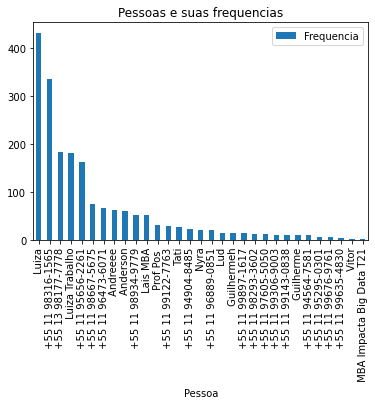

In [12]:
dict_pessoas = dict(Counter(list_pessoas))
pessoas_df = pd.DataFrame(dict_pessoas.items(), columns=['Pessoa', 'Frequencia'])
pessoas_df = pessoas_df.sort_values(by=['Frequencia'], ascending=False)
pessoas_df.plot(kind='bar', x = 'Pessoa', y='Frequencia', title='Pessoas e suas frequencias')

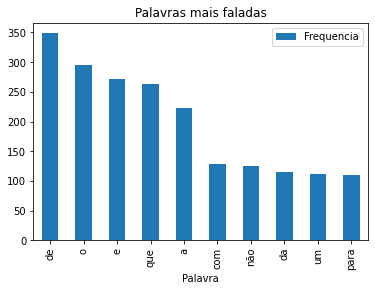

In [13]:
def contador_palavras(msgs):
    palavras = []
    for frases in msgs:
        for palavra in frases.split():
            palavras.append(palavra)
    return Counter(palavras)

palavras_dict = dict(contador_palavras(list_msgs))

palavras_df = pd.DataFrame(palavras_dict.items(), columns=['Palavra', 'Frequencia'])
palavras_df = palavras_df.sort_values(by=['Frequencia'], ascending=False)
palavras_df.head(10).plot(kind='bar', x = 'Palavra', y='Frequencia', title='Palavras mais faladas')

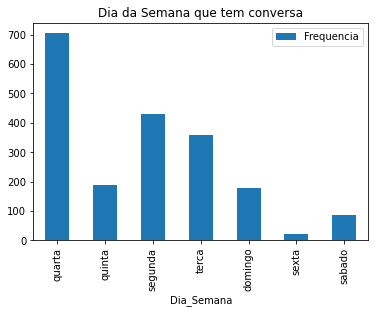

In [14]:
list_horas = []
list_dia_semana = []
for data in list_datas:
    list_horas.append(data.time().hour)
    
    if(data.weekday() == 1):
        list_dia_semana.append('segunda')
    elif(data.weekday() == 2):
        list_dia_semana.append('terca')
    elif(data.weekday() == 3):
        list_dia_semana.append('quarta')
    elif(data.weekday() == 4):
        list_dia_semana.append('quinta')
    elif(data.weekday() == 5):
        list_dia_semana.append('sexta')
    elif(data.weekday() == 6):
        list_dia_semana.append('sabado')
    elif(data.weekday() == 0):
        list_dia_semana.append('domingo')
        
dict_dia_semana = dict(Counter(list_dia_semana))

semana_df = pd.DataFrame(dict_dia_semana.items(), columns=['Dia_Semana', 'Frequencia'])
semana_df.plot(kind='bar', x = 'Dia_Semana', y='Frequencia', title='Dia da Semana que tem conversa')

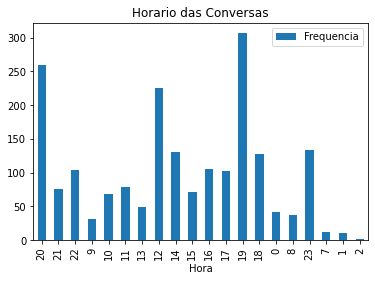

In [15]:
dict_horas = dict(Counter(list_horas))
horas_df = pd.DataFrame(dict_horas.items(), columns=['Hora', 'Frequencia'])
horas_df.plot(kind='bar', x = 'Hora', y='Frequencia', title='Horario das Conversas')

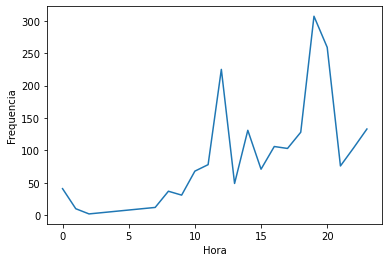

In [16]:
ax = sns.lineplot(x="Hora", y="Frequencia", data=horas_df, ci=68)